# L'Analyse en Composante Principale (ACP)
## Intuition
L'un des clés essentiels au succès d'un projet de data science est de comprendre le problème qu'on veut bien résoudre. La plupart des data scientists affirment que plus de 70% du temps qu'ils consacrent à la résolution d'un problème donné est consacré au nettoyage de la base de donnée et à la compréhension du problème. Donc avant même d'appliquer n'importe quel algorithme de Machine Learning il faut comprendre pourquoi on fait ce choix et quels sont les bénéfices pour la résolution du problème.   
L'analyse en composante principale est une l'un des outils qui font partie de l'arsenal des professionnels en science des données car il permet (1) de **résumer** et (2) **réduire** la dimension d'un jeu de données. Que faites-vous si vous avez un jeu de données contenant 10000 individus et 30 variables quantitatives? On peut essayer de calculer manuellement la moyenne, les écarts-types pour essayer de comprendre le jeu de données mais cela est long est fastidieux et on ne pourrait pas vraiment résumer l'information. C'est alors que vient l'ACP.  
Dans cet article, je vous épargnes les détails techniques de l'ACP que vous pouvez trouver partout sur Internet. A ce sujet je vous conseille fortement les vidéos de [François Husson](https://www.youtube.com/channel/UCyz4M1pwJBNfjMFaUCHCNUQ) qui sont sur Youtube et qui sont d'une grande qualité. Lui et l'équipe d'AgroCampus Ouest sont les auteurs du package (et même de la base de donnée que j'ai eu en suivant son MOOC sur FUN-MOOC) que je vais utiliser pour la réalisation de ce projet. 

### Les scripts ainsi que le notebook sont disponibles dans ce [répertoire GitHub](https://github.com/agailloty/projets). 

## Chargement de la base

Je travaillerai avec le langage R et plus précisément avec le package [FactoMiner](http://factominer.free.fr/index_fr.html). Comme j'aime bien faire de beaux graphiques, j'utiliserai les packages `ggplot2` et `autoplot` pour représenter les graphiques d'interprétations. Ce projet est destiné à offrir un pipeline cohérent pour réaliser vos études statistiques multivariées.

In [ ]:
library(FactoMineR)
library(ggplot2)
library(ggfortify)

La base de donnée sur laquelle je vais travailler concerne la fertilité moyenne des femmes dans 39 pays européens par catégorie d'âge: les 15-19 ans, 20-24 ans ...

In [2]:
fertility <- read.csv("data_PCA_Fertility.csv", sep= ';', row.names=1) # 

In [3]:
# Regardons comment se présente la base
head(fertility)

,X15.19,X20.24,X25.29,X30.34,X35.39,X40.et..,Area
Albania,20.8,107.1,126.7,72.3,24.4,5.5,South
Austria,8.6,44.5,89.2,94.6,46.8,9.6,West
Belarus,21.4,90.4,106.7,67.6,26.0,4.4,East
Belgium,9.0,52.6,127.0,116.6,48.3,9.6,West
Bosnia and Herzegovina,11.0,52.5,91.8,69.7,25.7,4.7,South
Bulgaria,42.1,71.9,90.9,67.1,27.2,4.7,East


In [4]:
dim(fertility)

[1] 39  7

Nous avons 39 individus et 7 variables.

# Analyse exploratoire 

## Statistiques descriptives

Cette partie est pour explorer la base de données afin de comprendre de quoi il est question, de la nettoyer si possible et la visualiser.

In [5]:
summarytools::descr(fertility, transpose = T)

,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
X15.19,14.333333,8.913365,3.5,8.0,12.0,19.2,42.1,8.30256,11.05,0.6218627,1.19413200,0.3782198,1.17945591,39,100
X20.24,55.348718,18.676243,29.2,41.3,52.5,68.4,107.1,19.12554,25.30,0.3374286,0.81770434,0.3782198,0.01278804,39,100
X25.29,97.271795,17.018395,57.6,85.2,93.8,108.4,132.1,19.12554,22.15,0.1749571,0.02981643,0.3782198,-0.61042969,39,100
X30.34,93.843590,22.795196,46.1,76.5,91.4,112.3,136.7,28.02114,34.75,0.2429063,0.17612427,0.3782198,-0.91437019,39,100
X35.39,45.197436,16.075750,19.9,32.7,43.4,57.3,97.5,18.38424,24.00,0.3556784,0.75110236,0.3782198,0.78358398,39,100
X40.et..,9.533333,4.191428,3.8,6.6,9.5,12.5,23.8,4.29954,5.45,0.4396603,0.99832021,0.3782198,1.32437008,39,100


La fonction `descr` du package `summarytools` nous affiche des élements utiles concernant notre base de données. Ce qu'on remarque dans un premier c'est les deux dernières colonnes qui nous indique le nombre de données valides. Heureusement pour nous aucune donnée n'est manquante, cela nous épargne du temps.  
Tout à gauche les 5 premières colonnes nous présentent les statistiques descriptives du jeu de données. On observe par exemple que la moyenne de la fertilité des femmes de plus de 40 ans est la plus faible, suivie de celle des 15-19 ans. L'écart-type de ces moyenne est reltivement élevé pour les femmes de 30-34, ce qui explique qu'il y a une assez forte variance entre les pays.
## Données groupées
Groupons maintenant ces données par région (Area) pour voir les moyennes des variables mais par régions. 

In [ ]:
library(tidyverse)

In [7]:
group_by(fertility, Area) %>% summarise_all(mean)

Area,X15.19,X20.24,X25.29,X30.34,X35.39,X40.et..
East,24.760000,68.12000,90.9400,70.8400,30.18000,5.76000
North,10.710000,53.11000,107.3900,111.6700,58.68000,13.05000
South,12.850000,53.76667,92.3750,86.9500,41.14167,8.87500
West,7.157143,43.01429,100.2571,113.0571,54.34286,11.02857


Ici nous avons les moyennes par régions. L'indication qu'on avait eu de la variance des 30-34 se confirme ici car on observe que la moyenne des fécondités varie fortement par région. Les 15-19 ont une plus grande fertilité en Europe de l'Est que dans les autres régions.

# Visualisation

In [8]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 3)

## Fertilité des 15-19 par pays

In [9]:
row.names(fertility)

[1] "Albania"                "Austria"                "Belarus"               
 [4] "Belgium"                "Bosnia and Herzegovina" "Bulgaria"              
 [7] "Croatia"                "Denmark"                "Estonia"               
[10] "Finland"                "France"                 "Germany"               
[13] "Greece"                 "Hungary"                "Iceland"               
[16] "Ireland"                "Italy"                  "Latvia"                
[19] "Lithuania"              "luxembourg"             "Macedonia"             
[22] "Malta"                  "Moldova"                "Montenegro"            
[25] "Netherlands"            "Norway"                 "Poland"                
[28] "Portugal"               "Rep. Czech"             "Romania"               
[31] "Russia"                 "Serbia"                 "Slovakia"              
[34] "Slovenia"               "Spain"                  "Sweden"                
[37] "Swiss"                  "UK"                     "Ukraine"

In [10]:
plot_fertility <- function(data, x=row.names(fertility), y, size_text = 3, ...){
    ggplot(data, aes(x = x)) + 
    geom_text(aes(y=y, label = x), size = size_text) + theme_classic() + 
theme(axis.text.x = element_blank()) + xlab(" ")
}

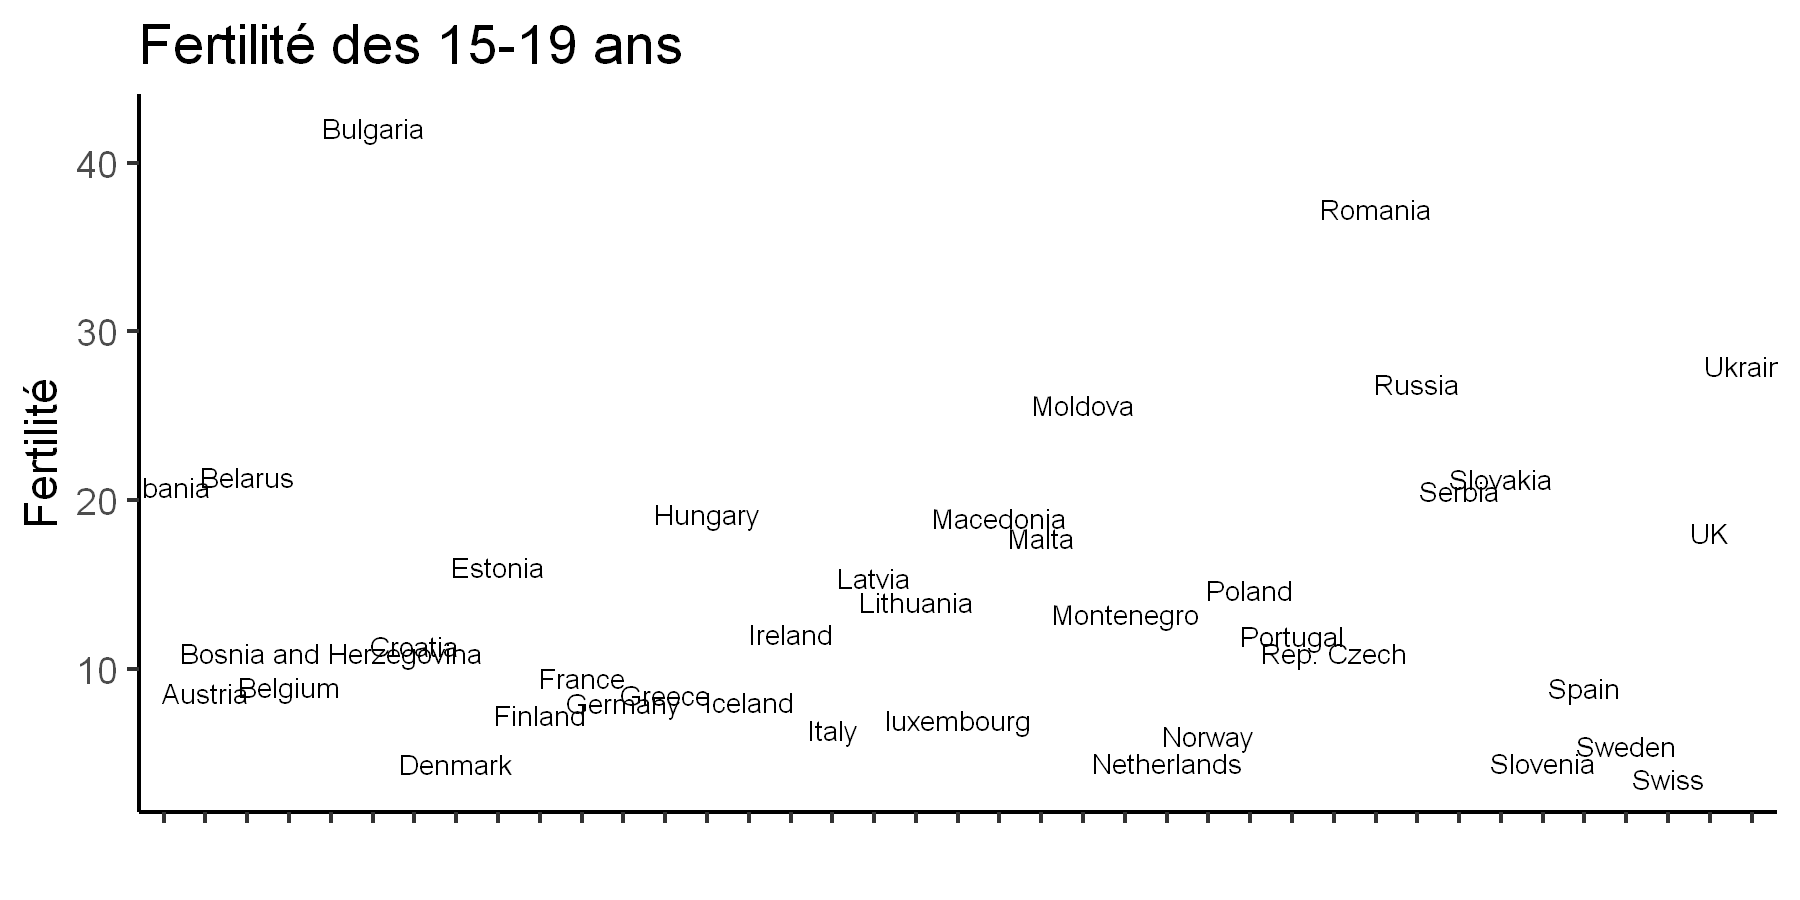

In [11]:
plot_fertility(fertility, y = fertility$X15.19, size_text = 2.4) + 
ggtitle("Fertilité des 15-19 ans") + ylab("Fertilité")

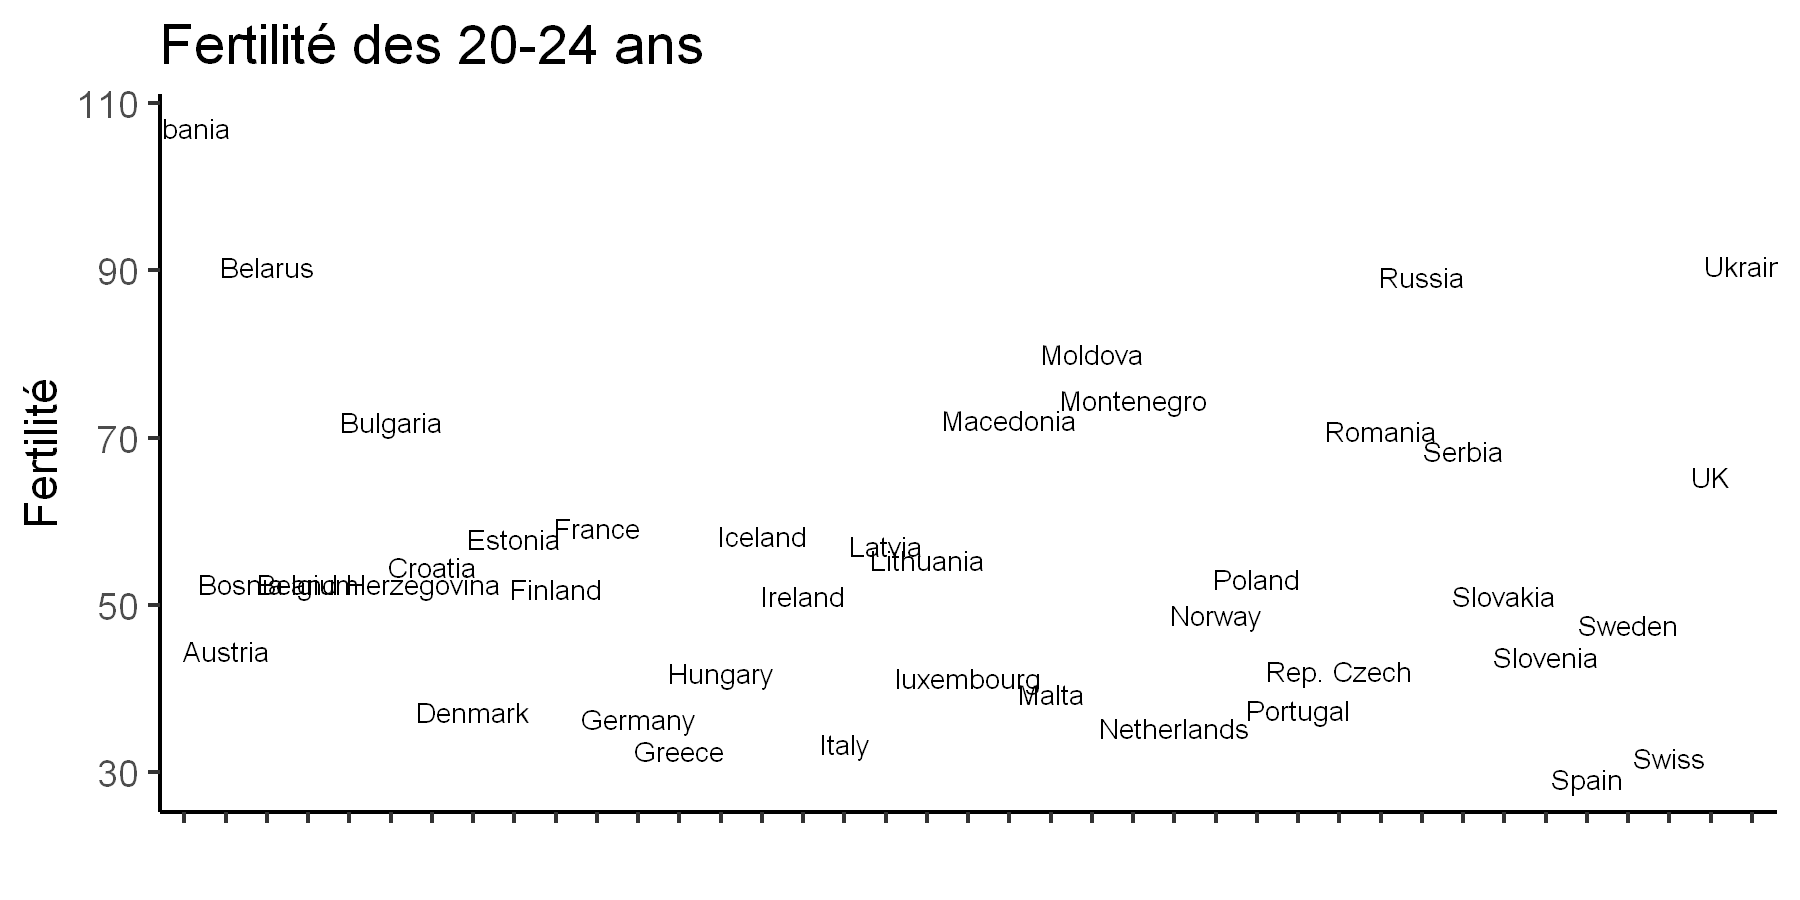

In [12]:
plot_fertility(fertility, y = fertility$X20.24, size_text = 2.4) + 
ggtitle("Fertilité des 20-24 ans") + ylab("Fertilité")

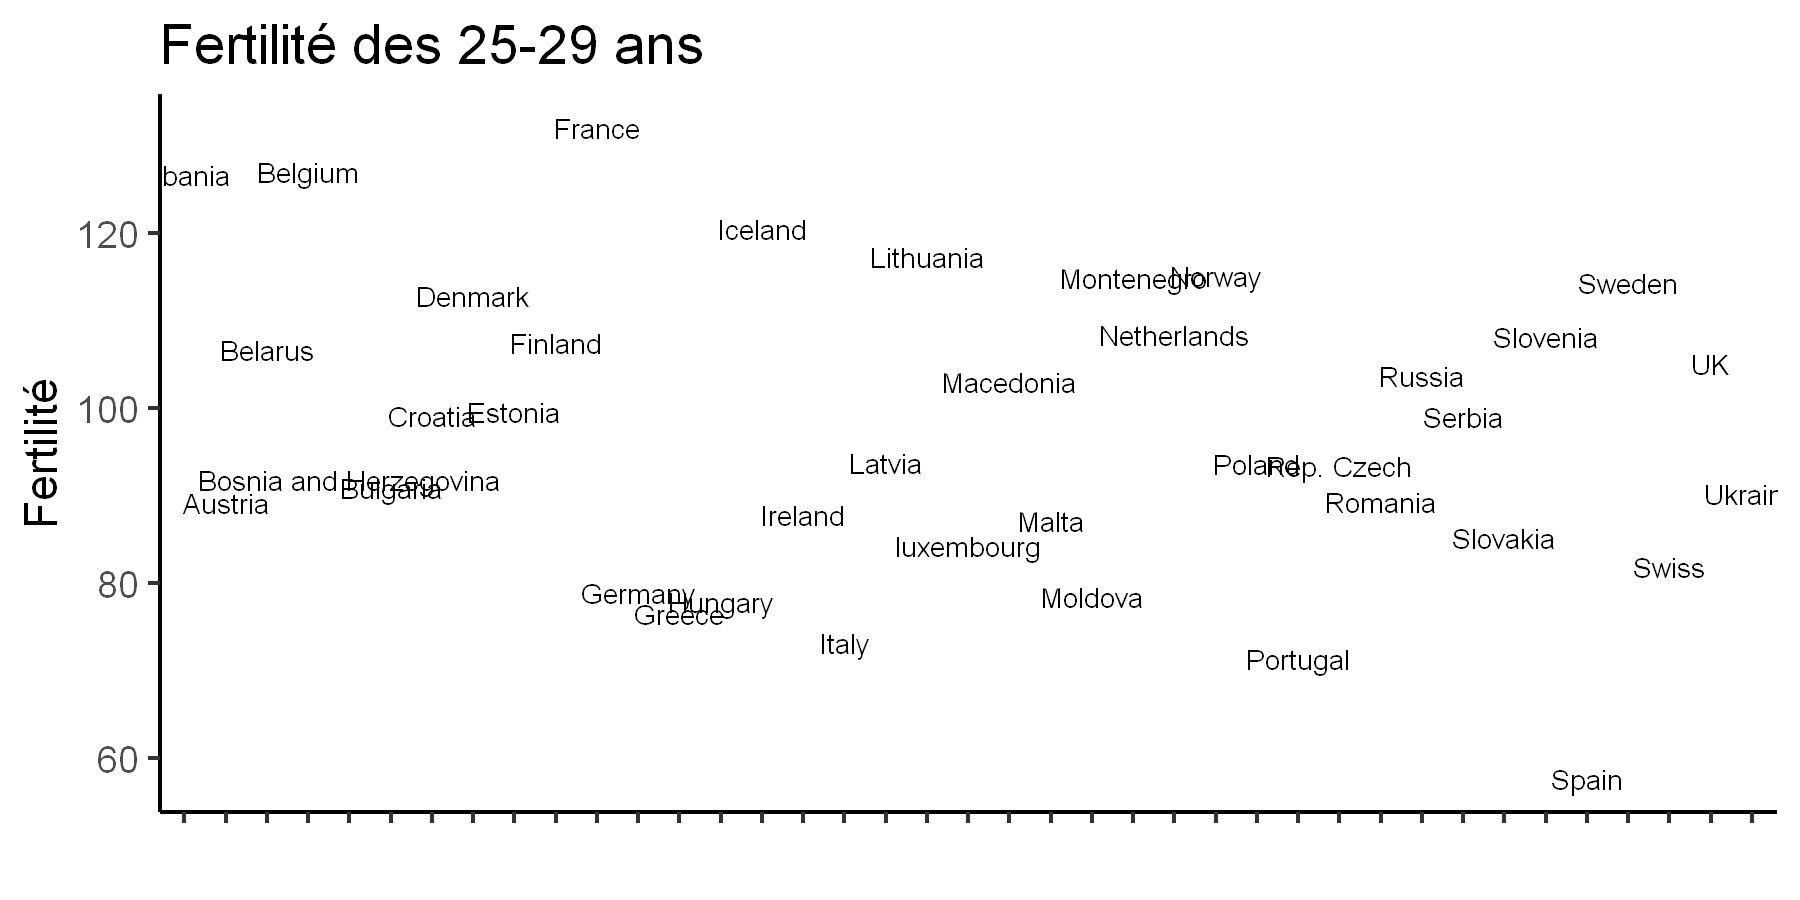

In [13]:
plot_fertility(fertility, y = fertility$X25.29, size_text = 2.4) + 
ggtitle("Fertilité des 25-29 ans") + ylab("Fertilité")

La France arrive en tête de la fertilité moyenne des 25-29 ans. 

## Corrélations

In [14]:
library(ggcorrplot)

Warning message:
"package 'ggcorrplot' was built under R version 3.5.2"

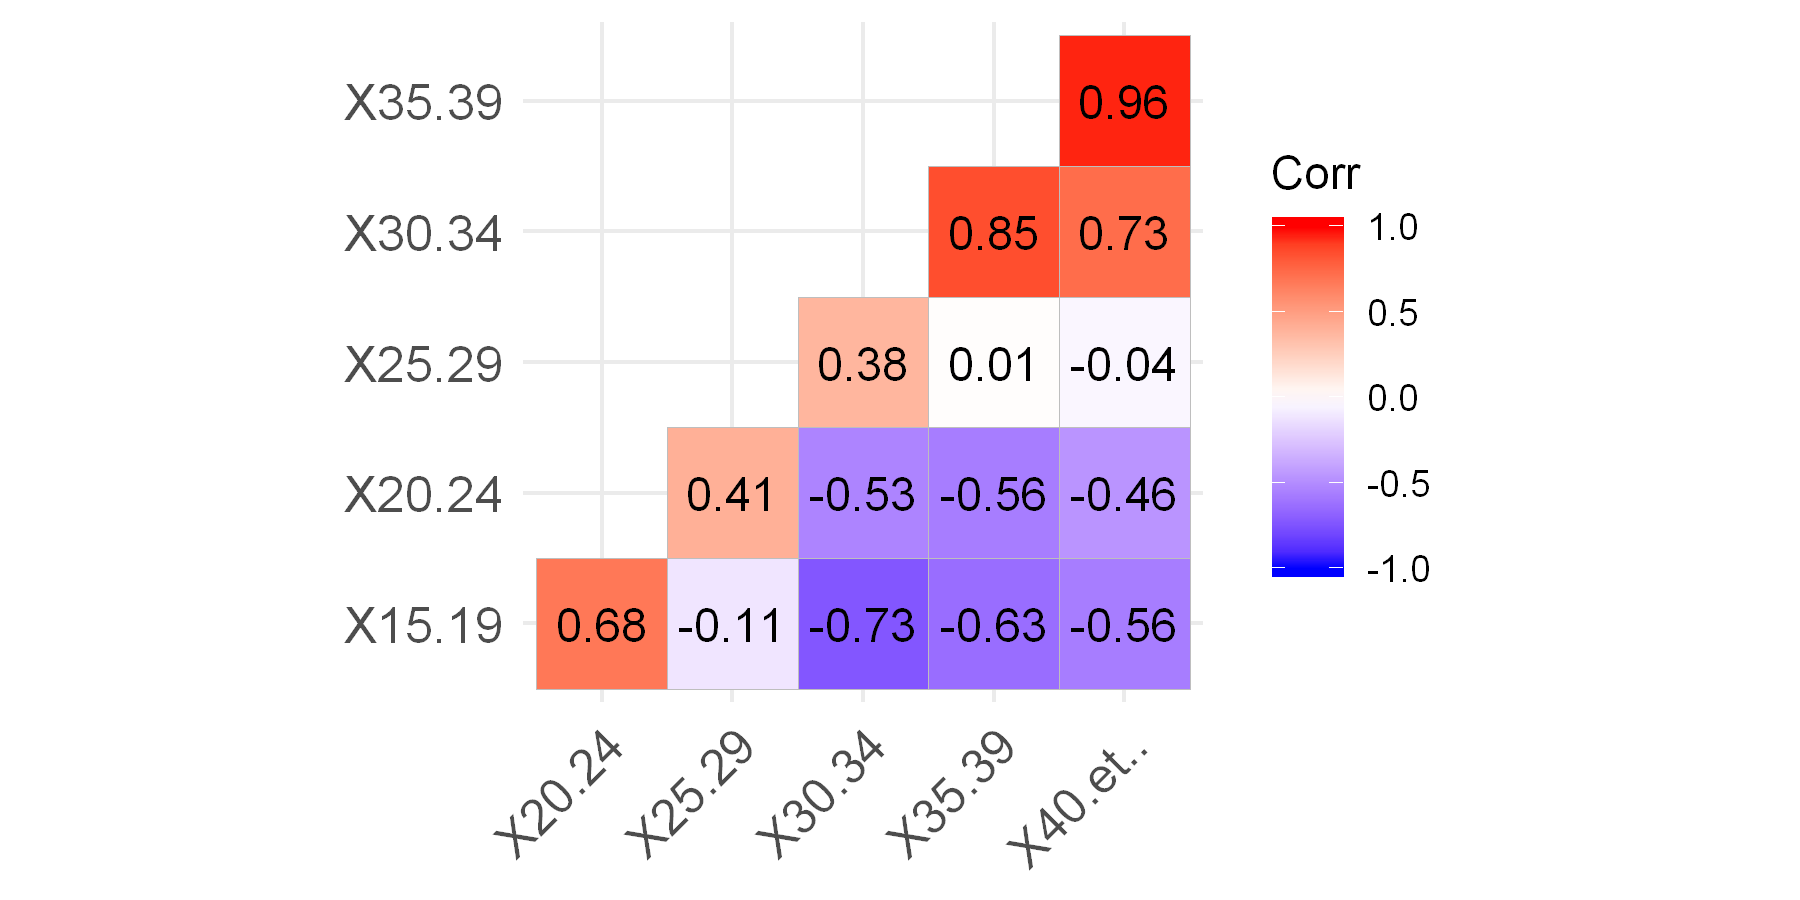

In [15]:
ggcorrplot(corr = cor(fertility[,-7]), hc.order = TRUE, type = "lower",
   lab = TRUE)

Ce graphique nous donne les corrélations entre les variables quantitatives du jeu de donnée. Par exemple la fertilité des 35-39 corrèle très fortement avec la fertilité des 40 ans et plus. 

# L'Analyse en composante principale
Comme on le voit au travers de ces graphiques, certaines variables différencient bien les pays, d'autres pas vraiment. On ne peut juste avoir qu'un aperçu mais pas un résumé complet qui nous permet de comprendre les facteurs de différence entre les pays. l'ACP nous aidera à mieux représenter les individus

## Construction

In [16]:
acp <- PCA(X = fertility, scale.unit = T, quali.sup = 7)

On vient de créer l'objet `acp` qui contient les résultats de l'analyse. Les arguments entrés dans la fonction PCA : X représente le jeu de donnée, scale.unit = T car on veut mettre à l'échelle toutes les variables et quali.sup = 7 c'est notre variable qualitative supplémentaire (7e colonne du jeu de données). 

In [17]:
# Voyons ce que contient l'objet acp
names(acp)

[1] "eig"       "var"       "ind"       "svd"       "quali.sup" "call"

Nous allons d'abord voir un résumé.

In [18]:
summary(acp, ncp = 2)


Call:
PCA(X = fertility, scale.unit = T, quali.sup = 7) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6
Variance               3.702   1.360   0.677   0.206   0.046   0.009
% of var.             61.704  22.665  11.287   3.427   0.772   0.145
Cumulative % of var.  61.704  84.369  95.656  99.084  99.855 100.000

Individuals (the 10 first)
                           Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
Albania                |  3.883 | -2.879  5.742  0.550 |  2.435 11.182  0.393 |
Austria                |  1.007 |  0.567  0.222  0.317 | -0.647  0.789  0.413 |
Belarus                |  2.990 | -2.762  5.283  0.853 |  0.964  1.751  0.104 |
Belgium                |  2.141 |  0.937  0.608  0.192 |  1.730  5.643  0.653 |
Bosnia and Herzegovina |  2.073 | -1.425  1.406  0.472 | -0.670  0.846  0.104 |
Bulgaria               |  3.870 | -3.359  7.816  0.754 | -0.338  0.216  0.008 |
Croatia                |  0.651 | -0.244  0.041  0.140 |  0.043 

Ici j'ai choisi de n'afficher que les détails des deux premières composantes principales (ncp =2).   
Les eignevalues représentent les valeurs propres. La première composante résume à elle seule près de 62% de la variance des individus, ce qui fait si on ajoute à ce pourcentage de variance, le pourcentage de variance de la deuxième composante nous résumons 84% de l'information. C'est un excellent score. Donc au lieu de 6 variables explicatives, seules 2 variables synthétiques suffisent pour comprendre la variabilité des individus.  Nous verrons comment commenter ces variables. 
## Graphique des variables
Représentons maintenant le graphique des variables sur les deux prémières composantes

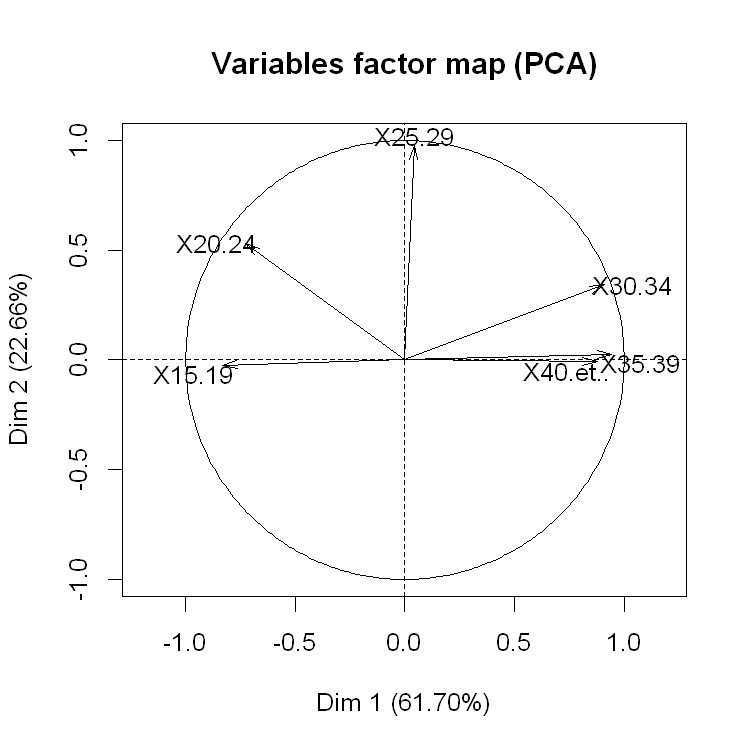

In [19]:
options(repr.plot.res = 150, repr.plot.width = 5, repr.plot.height = 5)
plot.PCA(acp, choix = "var")

### Comment lire ce graphique ?
Les deux axes de ce graphique représentent les coefficients de corrélations qui vont de -1 à 1. Les flèches indiquent à la fois la corrélation de chacune des variables à l'axe donnée et la corrélation des variables entre elles. Comme nous l'avions déja anticipé dans la partie corrélation on voit que la fertilité des femmes 35-39 ans corrèle fortement avec celle des femmes de plus de 40 ans. Et il se trouve également que ce sont ces deux variables + la variable des 30-34 qui sont les plus corrélées positivement avec l'axe 1. La variable 15-19 quant à elle est très négativement corrélée avec cette prémière axe.   
La variable X25-29 corrèle très fortement avec l'axe 2, les autres X20-24 et X30-34 corrèlent aussi positivement mais de manière modérée.
## Graphique des individus

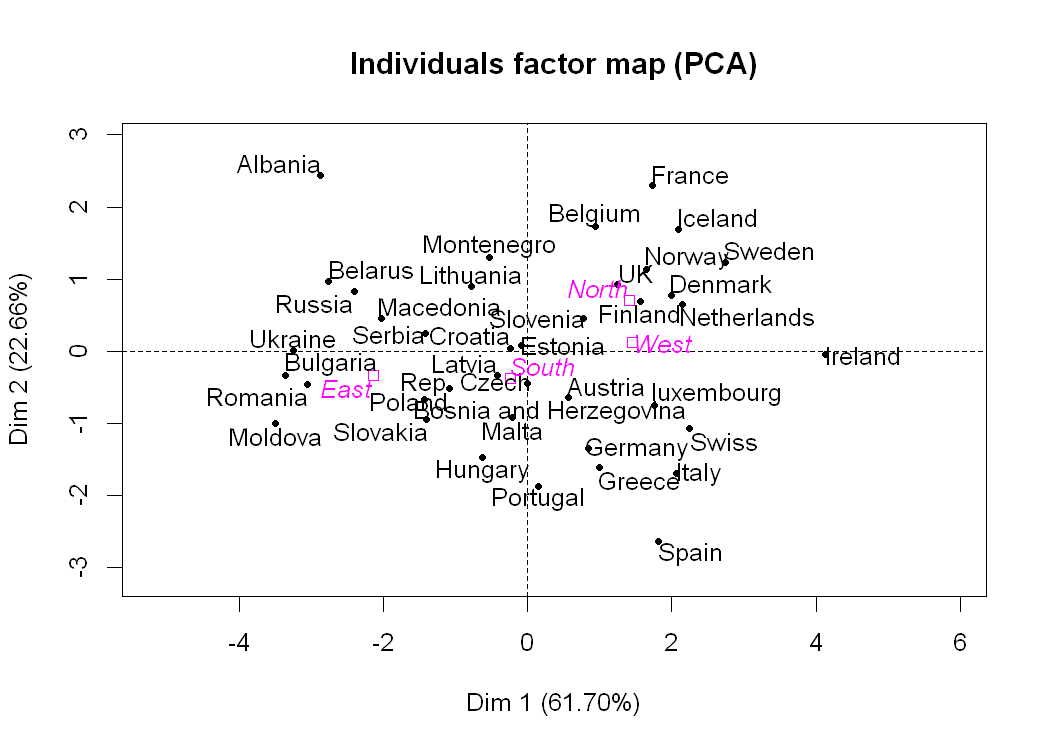

In [20]:
options(repr.plot.width = 7)
plot.PCA(acp, choix= "ind")

Ce graphique représente la distance des pays du barycentre. Un pays situé au centre de ce graphique a tendance à avoir des valeurs moyennes pour toutes les variables, inversement les pays qui s'éloignent du barycentre sont ont des valeurs éloignés de la moyenne et enfin la distance entre les pays traduit leur différence ou similitude. Pour voir un exemple, comparons les valeurs que prennent l'Espagne, l'Albanie et la Croatie

In [21]:
fertility[c("Spain", "Albania", "Croatia"),]

,X15.19,X20.24,X25.29,X30.34,X35.39,X40.et..,Area
Spain,8.9,29.2,57.6,91.2,62.4,14.9,South
Albania,20.8,107.1,126.7,72.3,24.4,5.5,South
Croatia,11.4,54.6,99.1,91.4,39.9,7.8,South


In [22]:
# Moyennes des colonnes
t(summarytools::descr(fertility)["Mean",])

X15.19,X20.24,X25.29,X30.34,X35.39,X40.et..
14.33333,55.34872,97.27179,93.84359,45.19744,9.533333


On voit ici que tout semble opposer l'Espagne et l'Albanie. L'Espagne a tendance à avoir des valeurs faibles pour les variables X15.19, X20.24 et X25.29 là où l'Albanie enregistre de forte valeurs, et similairement l'Espagne semble avoir des valeurs plus élevées pour X30.34, X35-39, X40.  
La Croatie qui se situe au près du barycentre a des valeurs proches de la moyenne des colonnes.
## Comment comprendre le graphique des individus?
L'interprétation du graphique des individus se fait en ayant en tête le cercle des corrélations (graphique des variables). Sur l'axe 1 les pays situés à droite sont les pays dans lesquels la fertilité des femmes de plus de 30 ans est la plus élévée et inversement pour les pays situés à gauche.

## Influence des variables et des individus

### Influence des variables

Dans cette section, il est question d'examiner les coordonnées des individus et des variables pour voir celles qui contribuent à la définition des axes, autrement y a-t-il des variables ou des individus sur-représentées dans la précédente analyse?

In [23]:
acp$var$contrib[, c("Dim.1", "Dim.2")]

,Dim.1,Dim.2
X15.19,18.66806198,0.042332761
X20.24,14.31907798,20.899108658
X25.29,0.04641997,70.412919869
X30.34,22.28022806,8.591130345
X35.39,23.98076041,0.049487266
X40.et..,20.70545160,0.005021103


Ce tableau nous montre la contribution des variables dans la définition des 2 axes. L'axe 1 est bien équilibrée car la contribution des variables est bien proportionnée, aucune variable n'est sur-représentée. Ce constat n'est pas valide pour la dimension 2 car la variable X25-29 semble sur-représentée avec 70% de la contribution à la définition de l'axe 2.

### Influence des individus

Quelles sont les individus qui influencent les plus les résultats de l'ACP? Nous chercherons pour axe les pays qui ont les plus d'impacts dans la construction de chacune des axes.

#### Première axe 

In [24]:
individus <- acp$ind$contrib[, c("Dim.1", "Dim.2")] %>% data.frame

In [25]:
options(scipen = 99) #Les décimales après la virgule

In [26]:
individus[order(individus$Dim.1, decreasing = T),]["Dim.1"] %>% head()

,Dim.1
Ireland,11.828437
Moldova,8.489856
Bulgaria,7.816444
Ukraine,7.277283
Romania,6.452351
Albania,5.742210


In [27]:
sum(individus[order(individus$Dim.1, decreasing = T),]["Dim.1"] %>% head())

[1] 47.60658

Ces individus sont les mieux représentés sur l'axe. A eux seuls ils contribuent à hauteur de 47% à la construction de l'axe 1.

#### La deuxième axe

In [28]:
individus[order(individus$Dim.2, decreasing = T),]["Dim.2"] %>% head()

,Dim.2
Spain,13.110490
Albania,11.182419
France,9.910815
Portugal,6.634490
Belgium,5.642806
Italy,5.438278


In [29]:
sum(individus[order(individus$Dim.2, decreasing = T),]["Dim.2"] %>% head())

[1] 51.9193

Ici ces 6 individus contribuent à hauteur de 52% à la définition de l'axe 2.

# Classification ascendante hiérarchique (CAH)

Nous voulons maintenant classer les individus en fonction de leurs ressemblances dans des clusters. C'est ce que nous permet de faire l'algorithme de la classification ascendante hiérarchique.

In [30]:
cluster <- HCPC(res= acp, nb.clust = 5)

In [31]:
cluster$data.clust %>% head()

,X15.19,X20.24,X25.29,X30.34,X35.39,X40.et..,Area,clust
Albania,20.8,107.1,126.7,72.3,24.4,5.5,South,1
Austria,8.6,44.5,89.2,94.6,46.8,9.6,West,3
Belarus,21.4,90.4,106.7,67.6,26.0,4.4,East,1
Belgium,9.0,52.6,127.0,116.6,48.3,9.6,West,4
Bosnia and Herzegovina,11.0,52.5,91.8,69.7,25.7,4.7,South,2
Bulgaria,42.1,71.9,90.9,67.1,27.2,4.7,East,1


Nous avons une copie de notre base de donnée

## Gain d'inertie

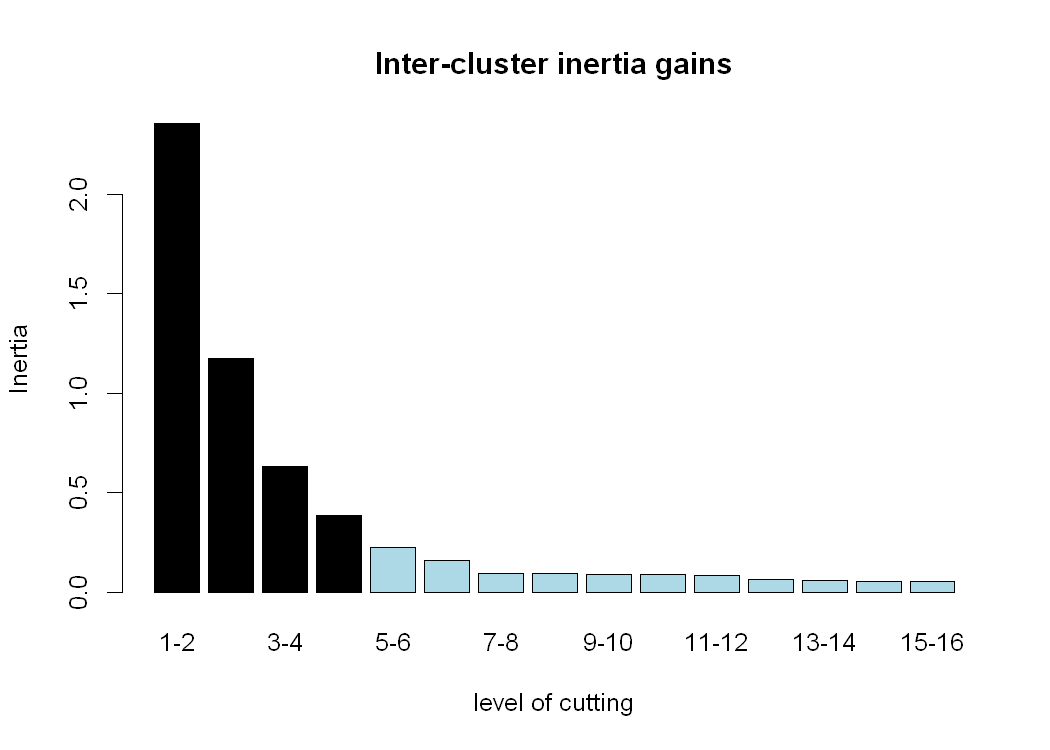

In [32]:
plot.HCPC(cluster, choice = "bar")

Ce graphique nous montre le gain d'inertie associé à l'ajout d'un cluster supplémentaire. Nous observons sur ce graphique qu'au delà de 4 clusters le gain d'inertie n'est plus significatif. Essayons d'abord de voir la proportion des individus dans chaque cluster

In [33]:
cluster$data.clust %>% group_by(clust) %>% summarize(nombre_individus = n())

clust,nombre_individus
1,8
2,12
3,8
4,10
5,1


Nous voyons que le cluster 1 ne compte qu'un seul pays, donc le graphique précédent nous a donné une bonne indication, il faudrait réduire le nombre de clusters à 4 pour être plus efficient.

In [34]:
cluster_2 <- HCPC(res = acp, nb.clust = 4)

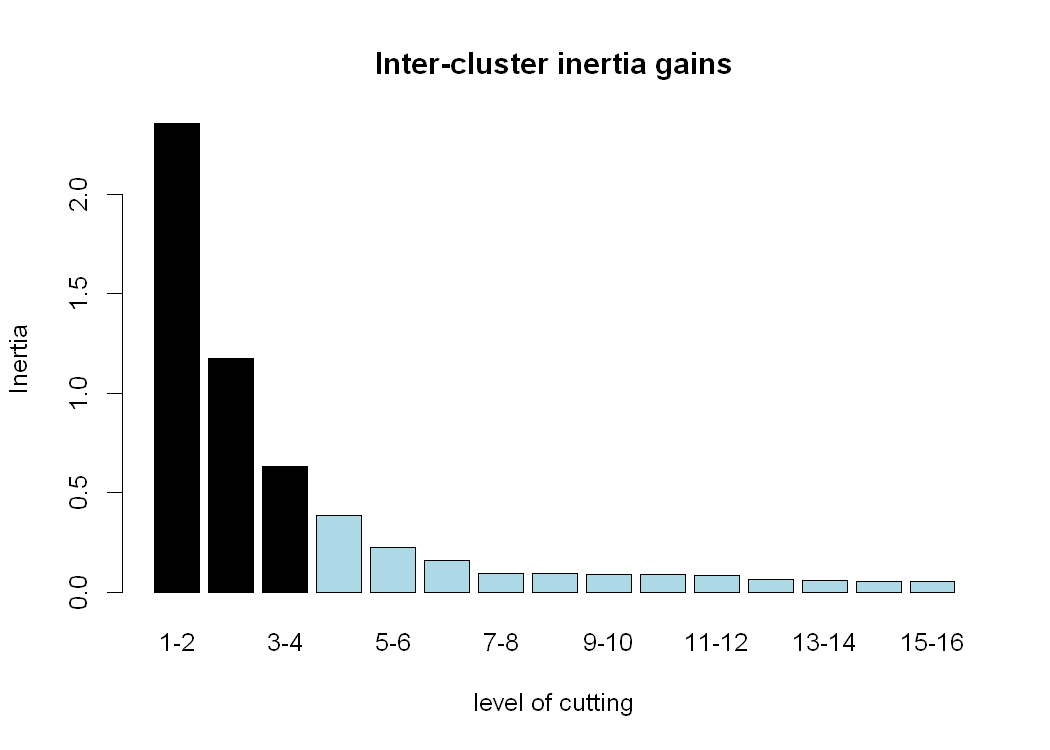

In [35]:
plot.HCPC(cluster_2, choice = "bar")

In [36]:
cluster_2$data.clust %>% group_by(clust) %>% summarize(nombre_individus = n())

clust,nombre_individus
1,8
2,14
3,7
4,10


Le classement est beaucoup plus équilibré avec 4 clusters. 

## Etude des cluster
On se donne maintenant la tâche d'étudier les clusters afin de comprendre les différences entre entre clusters et les similitudes entre les individus regroupés ensemble.

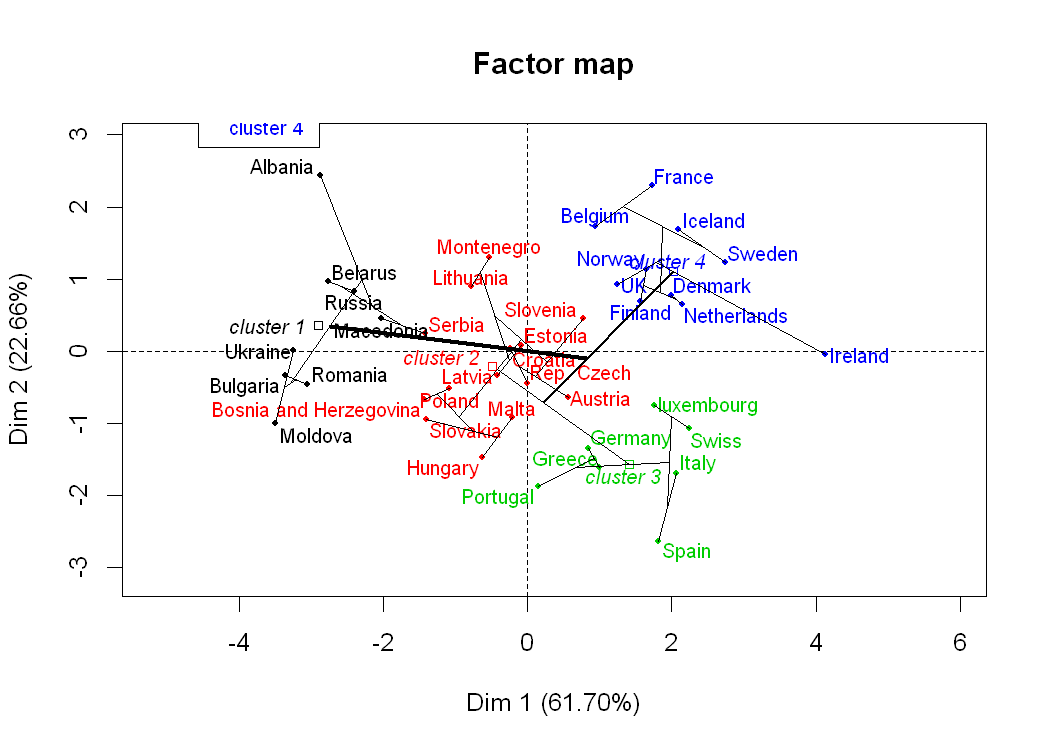

In [37]:
plot.HCPC(cluster_2, choice = "map")

## Caractéristiques des clusters

### Cluster 1

In [38]:
cluster_2$desc.var$quanti$"1"

,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
X20.24,4.871131,84.0250,55.348718,11.855774,18.435249,0.000001109614
X15.19,4.739694,27.6500,14.333333,7.642153,8.798349,0.000002140412
X40.et..,-3.412325,5.0250,9.533333,0.907951,4.137343,0.000644111719
X35.39,-3.692305,26.4875,45.197436,3.608822,15.868312,0.000222231138
X30.34,-3.911592,65.7375,93.843590,8.906730,22.501052,0.000091689697


Les pays du cluster 1 sont caractérisés par une fertilité des femmes de 15 à 24 supérieure aux autres pays. En moyenne la fertilité des femmes de cette tranche d'âge est de 84 alors que la moyenne générale est de 55.  
Par effet inverse la fertilité des femmes de plus de 30 ans est relativement faible que dans les autres pays. Les pays qui caractérisent ce cluster sont :

In [39]:
cluster_2$desc.ind$para$"1"

Ukraine    Russia   Belarus Macedonia   Romania 
0.6897370 0.8266269 0.9383311 1.3078615 1.4267448

### Cluster 2

In [40]:
cluster_2$desc.var$quanti$"2"

,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
X35.39,-1.994749,38.33571,45.19744,5.78787,15.86831,0.0460703


Les pays qui sont dans ce cluster ne se distinguent des autres pays que par la fertilité des femmes des 35 à 39 relativement plus faible que la moyenne des autres. Les pays qui caractérisent ce cluster sont :

In [41]:
cluster_2$desc.ind$para$"2"

Croatia     Poland     Latvia Rep. Czech    Estonia 
 0.4411900  0.7504489  0.8646242  0.9205150  0.9924027

In [42]:
cluster_2$desc.var$quanti$"3"

,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
X40.et..,2.047435,12.471429,9.533333,2.384901,4.137343,0.0406153689
X15.19,-2.154959,7.757143,14.333333,2.404078,8.798349,0.0311650310
X20.24,-3.247185,34.585714,55.348718,3.771104,18.435249,0.0011655268
X25.29,-3.851882,74.828571,97.271795,8.196814,16.798793,0.0001172135


Ce qui caractérise les pays présents dans ce cluster c'est leur fertilité des femmes de plus 40 plus élévée que la moyenne des autres pays. Les moyennes des fertilités des femmes de 15 à 29 ans sont faibles comparé aux autres pays. Les pays caractéristiques de ce cluster sont :

In [43]:
cluster_2$desc.ind$para$"3"

Greece    Germany luxembourg      Italy      Swiss 
 0.5592131  0.8331958  0.9148142  0.9946139  1.0439223

### Cluster 4

In [44]:
cluster_2$desc.var$quanti$"4"

,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
X30.34,4.928649,124.48,93.843590,7.732632,22.501052,0.0000008280034
X35.39,4.020047,62.82,45.197436,12.756159,15.868312,0.0000581864498
X40.et..,3.453041,13.48,9.533333,3.957221,4.137343,0.0005543049357
X25.29,3.404258,113.07,97.271795,11.713159,16.798793,0.0006634407437
X15.19,-2.416441,8.46,14.333333,3.943653,8.798349,0.0156730464208


Les pays qui se trouvent dans ce cluster ont une fertilité bien répartie sur toutes les catégories d'âge sauf les femmes de 15-19 qui ont une fertilité plus faible que la moyenne.

# Conclusion
En conclusion, l'ACP est une méthode très puissante et largement utilisée dans tous les domaines qui traitent des données. Il n'est donc pas étonnant qu'en économie on l'utilise grandement pour étudier les caractéristiques économiques des pays, les disparités etc... Les variables synthétiques que produit une ACP rendent facile la compréhension et l'interprétation d'un jeu de donnée multidimensionnel